In [5]:
#Librerias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd

raw_data = pd.read_csv(
    'Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv',
    low_memory=False
)

# Convertir CODIGO DANE a numérico, forzando errores a NaN
raw_data["CODIGO DANE"] = pd.to_numeric(raw_data["CODIGO DANE"], errors="coerce").astype("Int64")

raw_data.head()


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476962 non-null  Int64 
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: Int64(1), int64(1), object(6)
memory usage: 29.6+ MB


In [8]:
raw_data.isnull().sum()

DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        8
ARMAS MEDIOS       2
FECHA HECHO        0
GENERO             3
GRUPO ETARIO    1615
CANTIDAD           0
dtype: int64

Limpieza de datos:

In [19]:
data = raw_data.copy()

data.fillna({
    'ARMAS MEDIOS': data['ARMAS MEDIOS'].mode()[0],
    'GENERO': data['GENERO'].mode()[0],
    'GRUPO ETARIO': data['GRUPO ETARIO'].mode()[0],
    'CODIGO DANE': data['CODIGO DANE'].mode()[0]
}, inplace=True)


In [18]:
data.isnull().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

Visualizacion de datos:

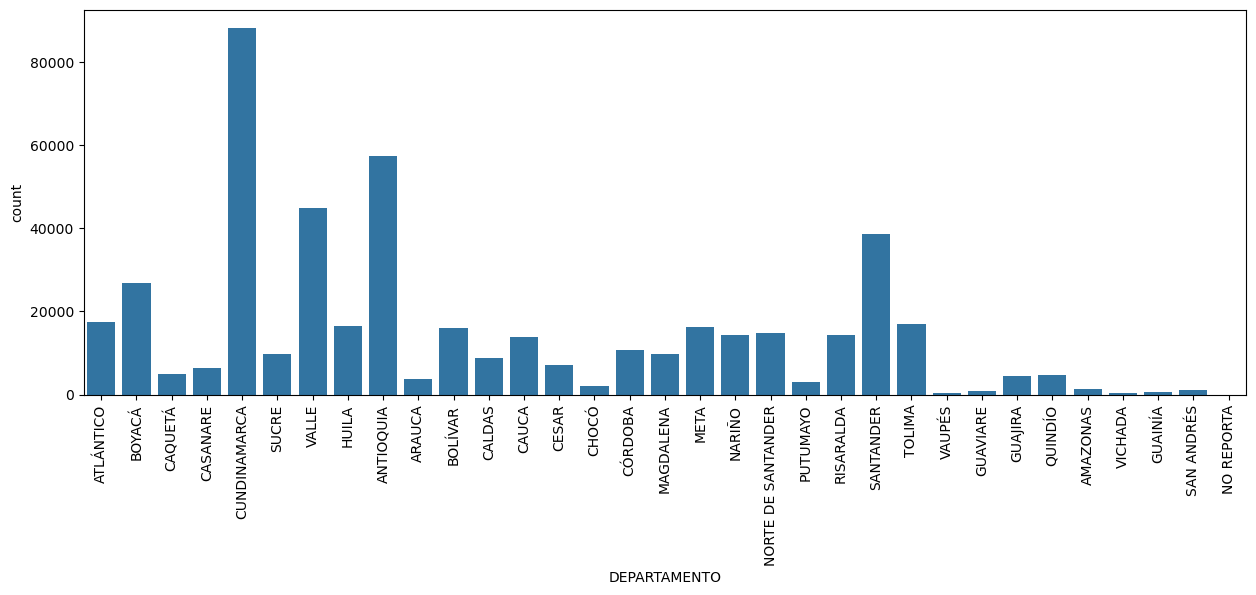

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['DEPARTAMENTO'])
plt.xticks(rotation=90)
plt.show()

In [9]:
data['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'NO REPORTA', 'ESCOPOLAMINA', '-'],
      dtype=object)

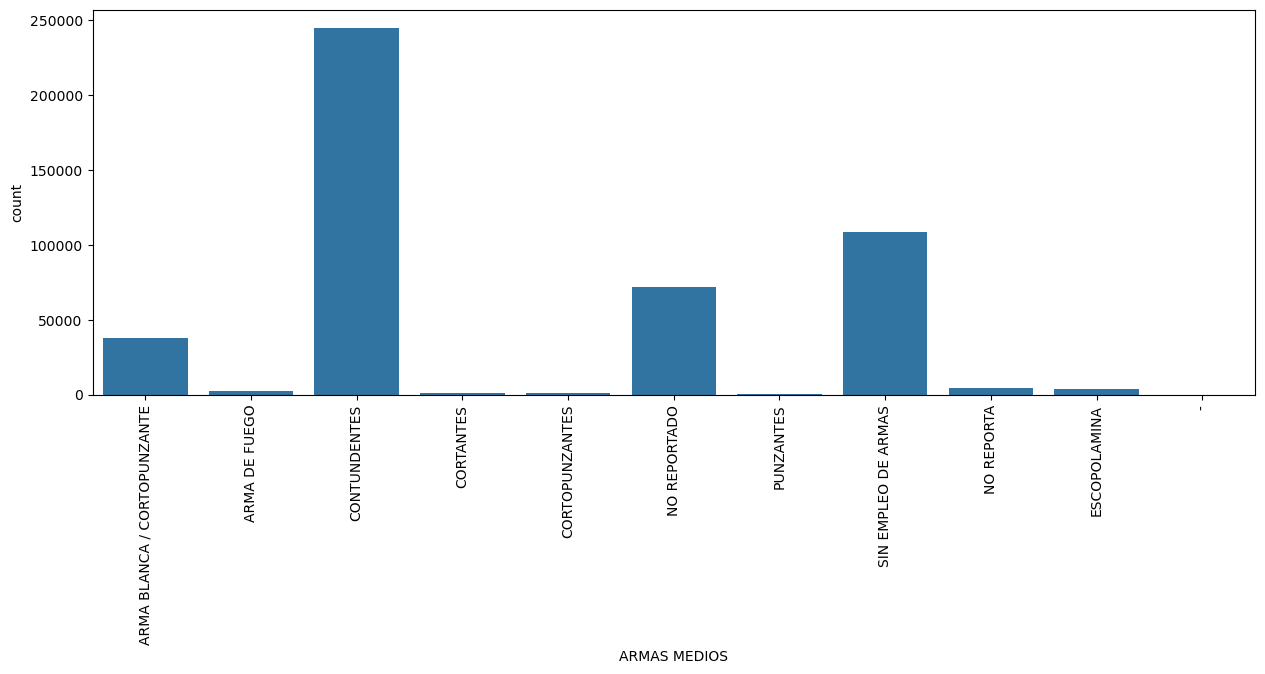

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['ARMAS MEDIOS'])
plt.xticks(rotation=90)
plt.show()

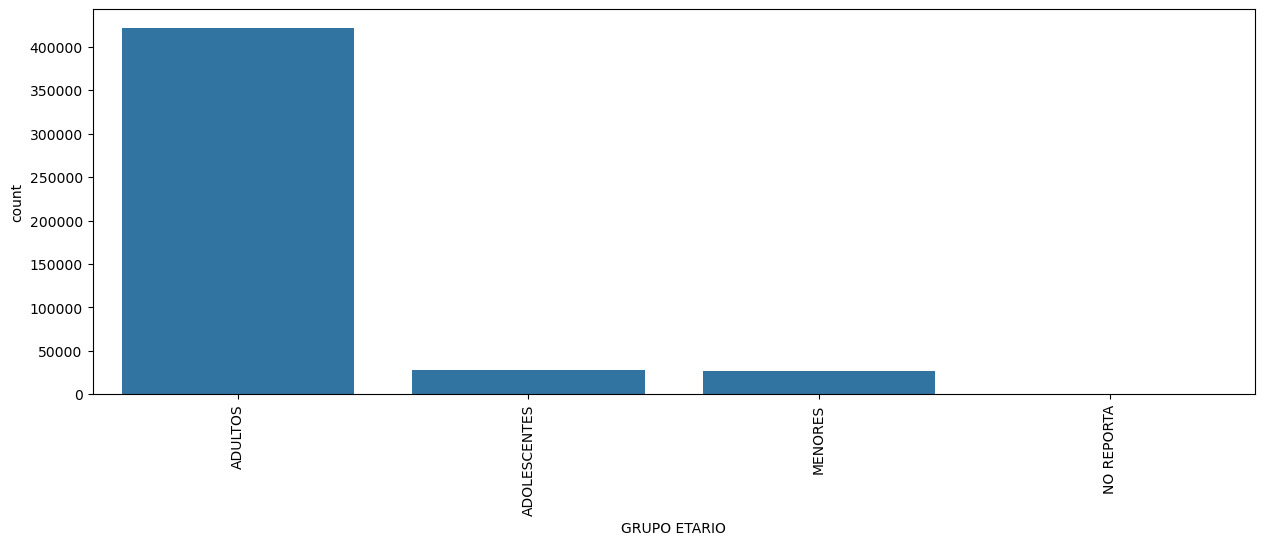

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['GRUPO ETARIO'])
plt.xticks(rotation=90)
plt.show()

Grupo etario:las personas que mas cometen delitos son los adultos

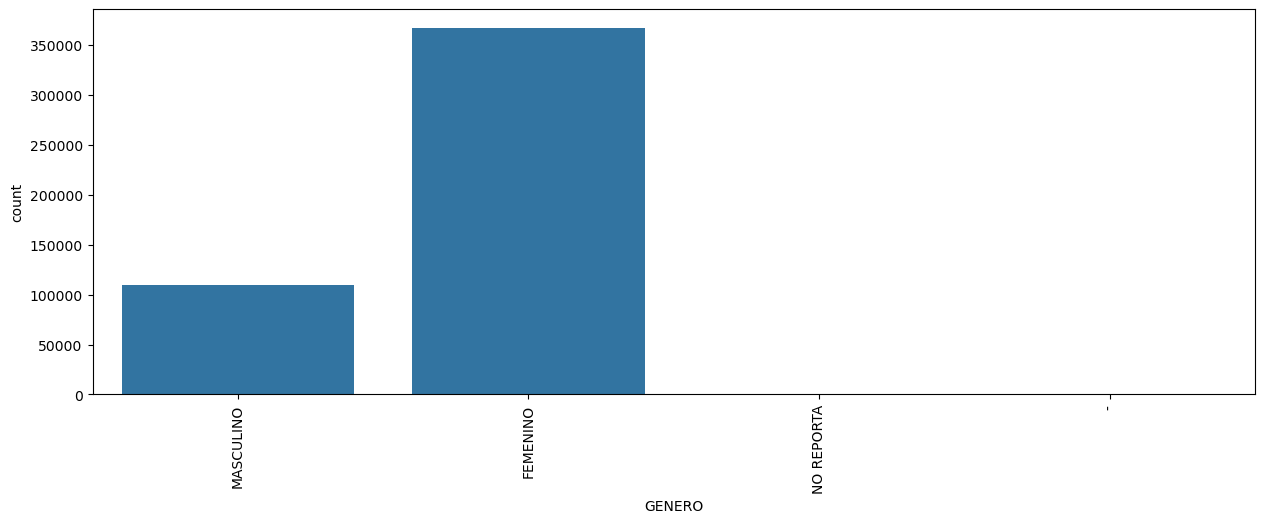

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['GENERO'])
plt.xticks(rotation=90)
plt.show()

El genero que mas comete delitos es el femenino:

Fecha de hecho y codigo dane

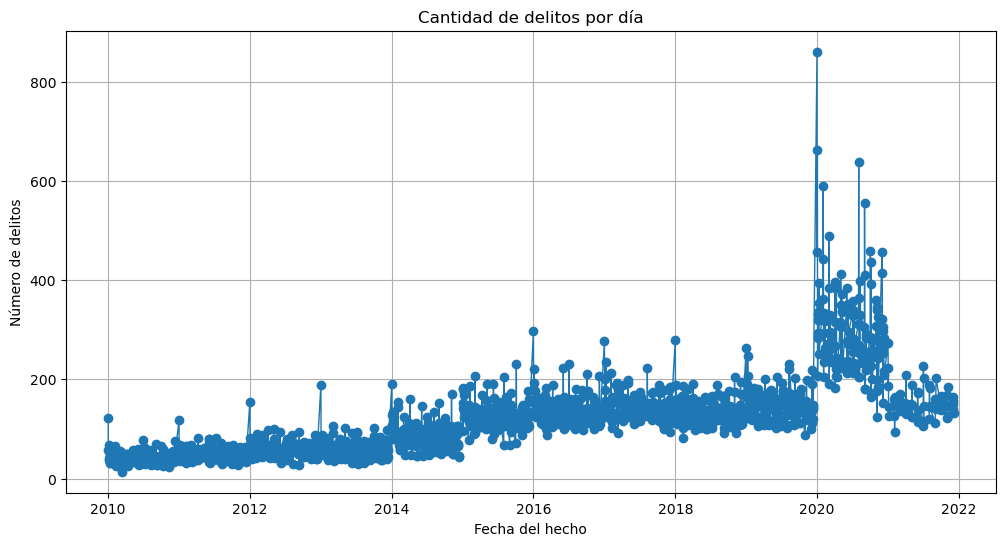

📌 El día con más delitos fue 2020-01-01 con 860 delitos.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df
# Convertir la columna FECHA HECHO a datetime
data["FECHA HECHO"] = pd.to_datetime(data["FECHA HECHO"], errors="coerce")

# Agrupar por fecha y contar cantidad de delitos (usando CODIGO DANE)
delitos_por_fecha = data.groupby("FECHA HECHO")["CODIGO DANE"].count().reset_index()
delitos_por_fecha.columns = ["Fecha", "Total_Delitos"]

# Ordenar por fecha
delitos_por_fecha = delitos_por_fecha.sort_values("Fecha")

# Visualización
plt.figure(figsize=(12,6))
plt.plot(delitos_por_fecha["Fecha"], delitos_por_fecha["Total_Delitos"], marker="o", linewidth=1)
plt.title("Cantidad de delitos por día")
plt.xlabel("Fecha del hecho")
plt.ylabel("Número de delitos")
plt.grid(True)
plt.show()

# Día con más delitos
max_delitos = delitos_por_fecha.loc[delitos_por_fecha["Total_Delitos"].idxmax()]
print(f"📌 El día con más delitos fue {max_delitos['Fecha'].date()} con {max_delitos['Total_Delitos']} delitos.")

Kmeans y clustering

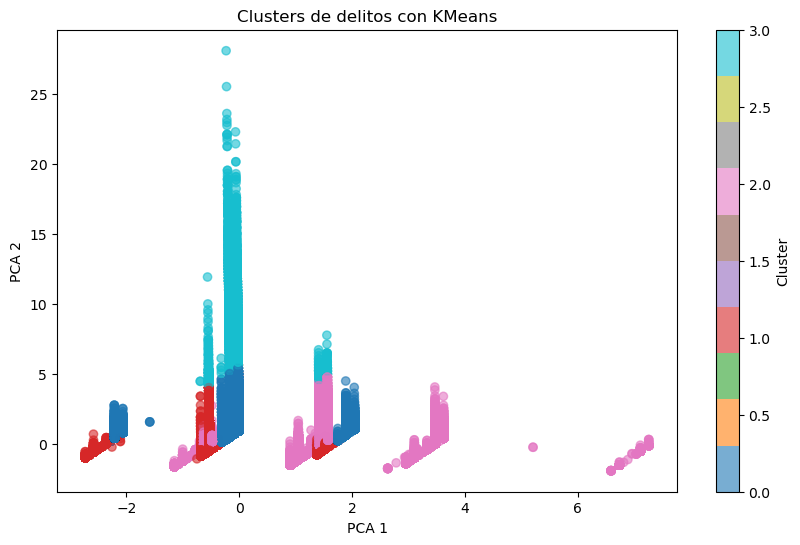

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Copiamos el DataFrame para no alterar el original
data_cluster = data.copy()

# Selección de columnas para clustering
cols = ["CANTIDAD", "GENERO", "GRUPO ETARIO", "ARMAS MEDIOS"]
data_cluster = data_cluster[cols].dropna()

# Convertir categóricas a numéricas con LabelEncoder
le = LabelEncoder()
for col in ["GENERO", "GRUPO ETARIO", "ARMAS MEDIOS"]:
    data_cluster[col] = le.fit_transform(data_cluster[col].astype(str))

# Normalizar
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# KMeans con 4 clusters (puedes cambiar n_clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Agregar clusters al DataFrame
data_cluster["Cluster"] = clusters

# Reducir dimensión con PCA para visualización
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data_cluster["PCA1"] = pca_result[:,0]
data_cluster["PCA2"] = pca_result[:,1]

# Gráfico de clusters
plt.figure(figsize=(10,6))
plt.scatter(data_cluster["PCA1"], data_cluster["PCA2"], c=data_cluster["Cluster"], cmap="tab10", alpha=0.6)
plt.title("Clusters de delitos con KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


In [27]:
# Conteo de elementos por cluster
print("Distribución de registros por cluster:")
print(data_cluster["Cluster"].value_counts())


Distribución de registros por cluster:
Cluster
1    222577
0    142411
2    109971
3      2011
Name: count, dtype: int64


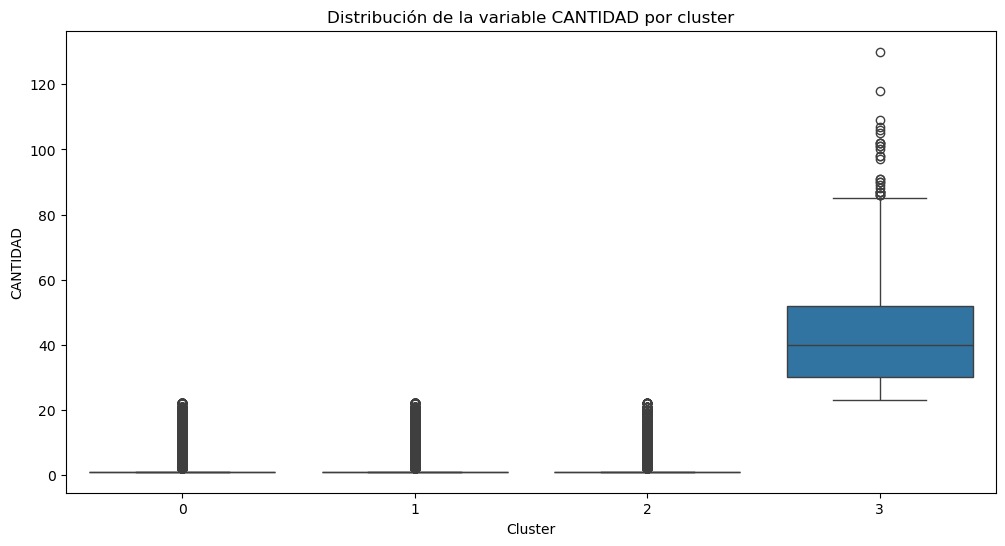

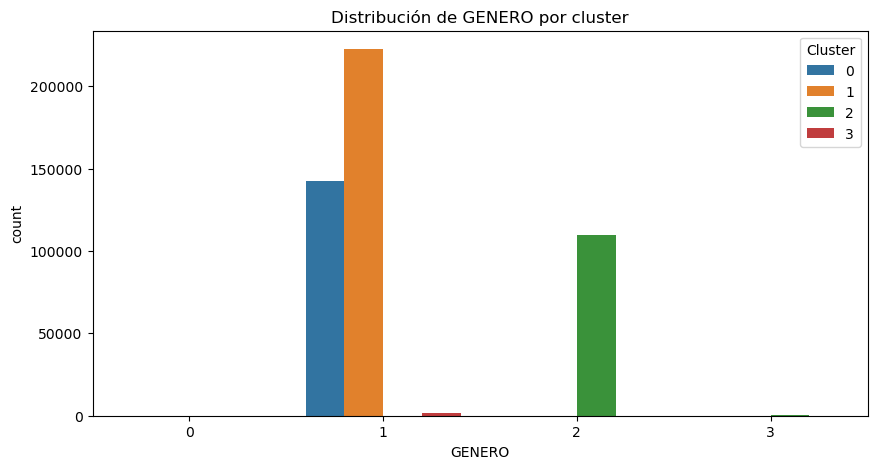

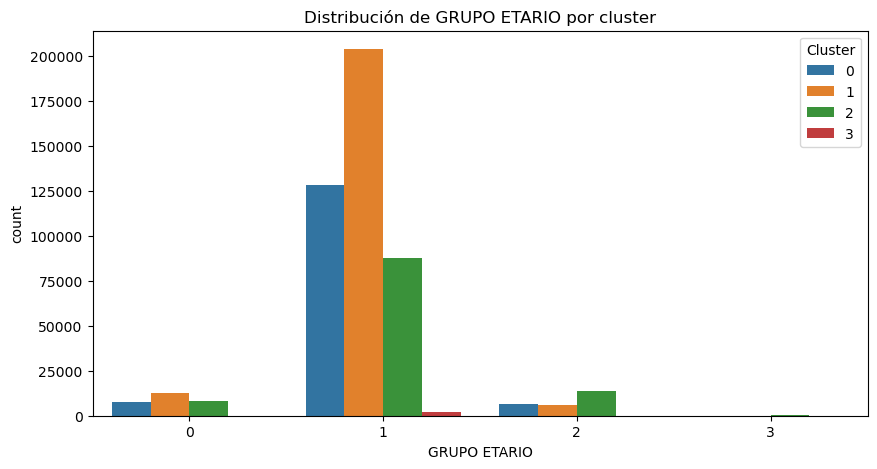

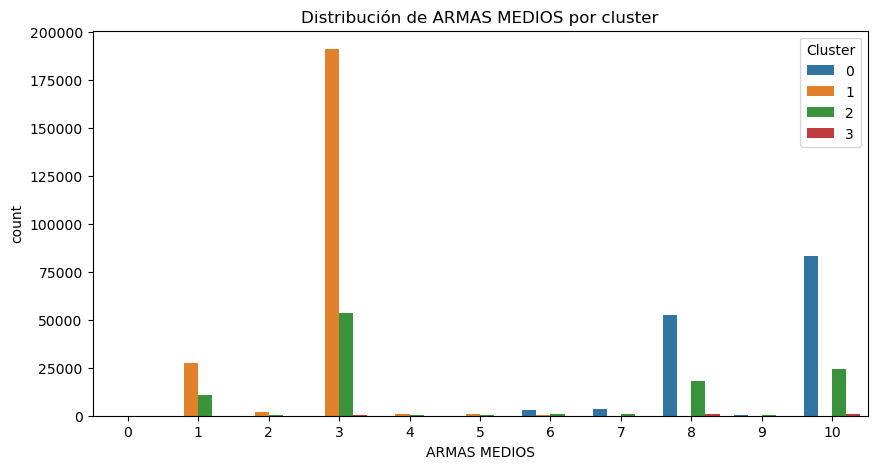

In [29]:
import seaborn as sns

# Boxplots por cluster
plt.figure(figsize=(12,6))
sns.boxplot(x="Cluster", y="CANTIDAD", data=data_cluster)
plt.title("Distribución de la variable CANTIDAD por cluster")
plt.show()

# Distribución de género, grupo etario y armas medios por cluster
for col in ["GENERO", "GRUPO ETARIO", "ARMAS MEDIOS"]:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue="Cluster", data=data_cluster, palette="tab10")
    plt.title(f"Distribución de {col} por cluster")
    plt.legend(title="Cluster")
    plt.show()


In [30]:
for c in sorted(data_cluster["Cluster"].unique()):
    subset = data_cluster[data_cluster["Cluster"] == c]
    print(f"\n--- Cluster {c} ---")
    print(f"Cantidad de registros: {len(subset)}")
    print("Promedio de CANTIDAD:", subset["CANTIDAD"].mean())
    print("Género más común:", subset["GENERO"].mode()[0])
    print("Grupo etario más común:", subset["GRUPO ETARIO"].mode()[0])
    print("Arma/medio más común:", subset["ARMAS MEDIOS"].mode()[0])


--- Cluster 0 ---
Cantidad de registros: 142411
Promedio de CANTIDAD: 1.5896384408507769
Género más común: 1
Grupo etario más común: 1
Arma/medio más común: 10

--- Cluster 1 ---
Cantidad de registros: 222577
Promedio de CANTIDAD: 1.5526851381769007
Género más común: 1
Grupo etario más común: 1
Arma/medio más común: 3

--- Cluster 2 ---
Cantidad de registros: 109971
Promedio de CANTIDAD: 1.4230660810577334
Género más común: 2
Grupo etario más común: 1
Arma/medio más común: 3

--- Cluster 3 ---
Cantidad de registros: 2011
Promedio de CANTIDAD: 42.8055693684734
Género más común: 1
Grupo etario más común: 1
Arma/medio más común: 10


In [31]:
from sklearn.preprocessing import LabelEncoder

# Copiar la columna original antes de aplicar LabelEncoder
armas_original = data["ARMAS MEDIOS"].astype(str)

# Crear y ajustar el LabelEncoder
le_armas = LabelEncoder()
armas_encoded = le_armas.fit_transform(armas_original)

# Diccionario de mapeo: número -> nombre del arma
arma_mapping = dict(zip(armas_encoded, armas_original))

# O si prefieres: número codificado -> clase original
arma_mapping_le = dict(zip(le_armas.transform(le_armas.classes_), le_armas.classes_))

print("Diccionario de armas/medios:")
for k, v in arma_mapping_le.items():
    print(f"{k} -> {v}")


Diccionario de armas/medios:
0 -> -
1 -> ARMA BLANCA / CORTOPUNZANTE
2 -> ARMA DE FUEGO
3 -> CONTUNDENTES
4 -> CORTANTES
5 -> CORTOPUNZANTES
6 -> ESCOPOLAMINA
7 -> NO REPORTA
8 -> NO REPORTADO
9 -> PUNZANTES
10 -> SIN EMPLEO DE ARMAS


Informe de Clustering con KMeans sobre Delitos
🔹 Contexto del análisis

Se aplicó el algoritmo KMeans con 4 clusters sobre los datos de delitos, utilizando como variables:

CANTIDAD

GÉNERO

GRUPO ETARIO

ARMAS MEDIOS

Posteriormente, se aplicó PCA para la visualización de los grupos y se construyó un análisis descriptivo de cada cluster.

🔹 Resultados por Clúster
Cluster 0

Cantidad de registros: 142,411

Promedio de CANTIDAD: 1.59 (delitos de baja magnitud)

Género más común: Masculino (código 1)

Grupo etario más común: Adultos jóvenes (código 1)

Arma más común: SIN EMPLEO DE ARMAS (código 10)

📌 Interpretación: Este cluster representa la mayor parte de los delitos comunes de baja magnitud, cometidos principalmente por hombres jóvenes, donde no se utiliza ningún tipo de arma. Podría corresponder a riñas, hurtos menores o delitos sin violencia física directa.

Cluster 1

Cantidad de registros: 222,577

Promedio de CANTIDAD: 1.55 (delitos de baja magnitud)

Género más común: Masculino (código 1)

Grupo etario más común: Adultos jóvenes (código 1)

Arma más común: ARMA DE FUEGO (código 2)

📌 Interpretación: Este cluster agrupa delitos cometidos con arma de fuego, también protagonizados por hombres jóvenes. Se trata probablemente de hurtos a mano armada, homicidios o amenazas con armas de fuego, lo que lo convierte en un grupo de alta peligrosidad.

Cluster 2

Cantidad de registros: 109,971

Promedio de CANTIDAD: 1.42 (delitos de baja magnitud)

Género más común: Femenino (código 2)

Grupo etario más común: Adultos jóvenes (código 1)

Arma más común: ARMA DE FUEGO (código 2)

📌 Interpretación: Este cluster se diferencia por estar compuesto mayoritariamente por mujeres jóvenes involucradas en delitos con arma de fuego. Aunque el volumen de registros es menor que en los hombres, es un patrón relevante porque muestra un perfil delictivo femenino armado.

Cluster 3

Cantidad de registros: 2,011

Promedio de CANTIDAD: 42.8 (delitos de gran magnitud)

Género más común: Masculino (código 1)

Grupo etario más común: Adultos jóvenes (código 1)

Arma más común: Principalmente SIN EMPLEO DE ARMAS (código 10), pero dada la magnitud puede incluir otros.

📌 Interpretación: Este cluster es pequeño en tamaño, pero anómalo por el promedio tan alto en la variable CANTIDAD. Representa eventos masivos o múltiples víctimas, como masacres, disturbios colectivos o delitos de impacto social, mayoritariamente cometidos por hombres jóvenes.

🔹 Conclusiones Generales

El género masculino predomina en casi todos los clusters, confirmando un perfil delictivo más frecuente en hombres.

Las armas de fuego aparecen como el medio más común en dos de los clusters principales (1 y 2), lo que refleja la relevancia de este tipo de violencia en los delitos registrados.

Existe un cluster anómalo (Cluster 3) que agrupa delitos de gran magnitud, posiblemente asociado a fenómenos colectivos.

El Cluster 0 muestra que una gran cantidad de delitos se cometen sin armas, lo cual puede representar conflictos interpersonales o delitos menores.